In [ ]:
from IPython.core.display import Image

<h1>What is a network?</h1>

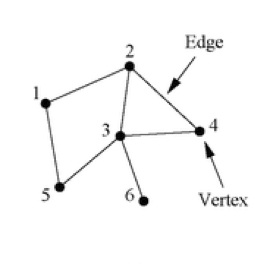

- It is made up of *vetices* connected by *edges.*

- Sometimes we call these *nodes* and "links."

<h2>Some examples</h2>

- Technological networks
  - the internet
  - the power grid
- Social networks
- Networks of information
  - the web
  - citation networks
- Biological networks
  - food webs
  - neural networks
- Semantic Networks

<h2>Key things one does in network analysis:</h2>

- Make nice visualizations
- See how they break into parts
- Measures
    - Overall statistics for a network
    - Measures associated with individual nodes
- Look at overall properties of large networks
- Models of network construction

<h2>Representations of Networks</h2>

One way to do it: A list of the edges.

- [(1, 5), (2, 4), (5, 3), (3, 6), (3, 4)]

https://networkx.github.io/documentation/stable/index.html

In [ ]:
import networkx as nx # This is a package for doing some things with networks in python
import numpy as np

**Create an empty graph**

In [ ]:
G = nx.Graph()

**add nodes**

In [ ]:
G.add_node(1)

In [ ]:
G.add_nodes_from([2, 3, 4, 5, 6])

**Draw it**

In [ ]:
nx.draw_networkx(G)

In [ ]:
import matplotlib.pyplot as plt
plt.axis('off')
nx.draw_networkx(G)

**Add edges**

In [ ]:
G.add_edge(1, 2)

In [ ]:
G.add_edges_from([(1, 5), (2, 4), (5, 3), (3, 6), (3, 4)])

In [ ]:
plt.axis('off')
nx.draw_networkx(G)

**Nodes don't have to be numbers**

In [ ]:
G2 = nx.Graph()
G2.add_nodes_from(["a","b","c"])

In [ ]:
plt.axis("off")
nx.draw_networkx(G2)

## Adjacency Matrices

You can represent a network as a matrix. Each row and each column corresponds to a node. If there is a non-zero number in a cell then there is a connection between the node corresponding to the row and the column.

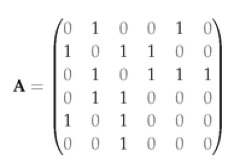

Here's a little function that builds a networkx graph from an adjacency matrix.

In [ ]:
def build_graph_from_Aij(am):
    g = nx.Graph()
    dim = len(am)
    g.add_nodes_from([(n + 1) for n in range(dim)])
    for r in range(dim):
        for c in range(dim):
            if am[r][c] != 0:
                g.add_edge(r + 1, c + 1)
    return g

In [ ]:
am = np.array([[0, 1, 0, 0, 1, 0], [1, 0, 1, 1, 0, 0], [0, 1, 0, 1, 1, 1], [0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0]])

In [ ]:
print(am)

In [ ]:
new_G = build_graph_from_Aij(am)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.axis("off")
nx.draw_networkx(new_G, width=.5, alpha=.5, font_size=10, node_size=500)

## Directed Graphs

The edges that connect two nodes can have a direction. We draw an arrow instead of just a line.

In [ ]:
directed_G = nx.DiGraph()

In [ ]:
directed_G.add_node(1)
directed_G.add_node(2)

In [ ]:
directed_G.add_edge(1, 2)

In [ ]:
nx.draw_networkx(directed_G)

In [ ]:
amd = np.array([[0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])

In [ ]:
print(amd)

In [ ]:
def build_digraph_from_Aij(am):
    g = nx.DiGraph()
    dim = len(am)
    g.add_nodes_from([(n + 1) for n in range(dim)])
    for r in range(dim):
        for c in range(dim):
            if am[r][c] != 0:
                g.add_edge(c + 1, r + 1)
    return g

In [ ]:
dG = build_digraph_from_Aij(amd)

In [ ]:
dG.edges()

In [ ]:
nx.draw_networkx(dG)

## Reading network files in some standard formats

In [ ]:
karate_g = nx.read_gml("network_data/karate.gml", label="id")

In [ ]:
karate_g.edges()

In [ ]:
plt.figure(figsize=(10, 10))
plt.axis("off")
nx.draw_networkx(karate_g)

In [ ]:
les_mis_g = nx.read_gml("network_data/lesmis.gml")

In [ ]:
label_dict = {}
for n in les_mis_g.nodes():
    label_dict[n] = n

In [ ]:
plt.figure(figsize=(10, 10))
nx.draw_spring(les_mis_g, labels=label_dict, width=.5, alpha =.5, font_size=10, node_size=100)

In [ ]:
from networkx.drawing.layout import spring_layout
pos = spring_layout(les_mis_g, k=.05)
plt.figure(figsize=(30, 30))
plt.axis('off')
nx.draw_networkx(les_mis_g, pos=pos, width=.5, alpha=.5, font_size=20, node_size=100)